In [2]:
 # Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
 # Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin", 
    language="en" 
)

In [6]:
 # Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum", 
    language="en" 
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
        
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)


bitcoin_df.head()


,text,date,compound,positive,negative,neutral
0,It was 8:45 in the morning of June 13 when Bil...,2022-08-03,0.5574,0.119,0.000,0.881
1,"Tools to trace cryptocurrencies have, over jus...",2022-08-02,0.0000,0.000,0.000,1.000
2,You gotta hand it to some people for being imp...,2022-07-25,0.5994,0.130,0.034,0.835
3,Cryptocurrencies are often criticized for bein...,2022-08-18,-0.5584,0.068,0.170,0.763
4,Elon Musk-owned electric vehicle making compan...,2022-07-21,0.2023,0.053,0.000,0.947


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)


ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,Cryptocurrencies are often criticized for bein...,2022-08-18,-0.5584,0.068,0.170,0.763
1,The non-fungible token\r\n (NFT) market has fa...,2022-08-04,-0.0217,0.048,0.051,0.901
2,"It's a day of the week ending in the letter ""y...",2022-08-02,-0.2732,0.059,0.115,0.827
3,"Less than two weeks into its soft launch, Game...",2022-07-23,-0.1531,0.000,0.045,0.955
4,"The Ethereum Merge is significant, and not jus...",2022-07-25,0.2023,0.048,0.000,0.952


In [9]:
 # Describe the Bitcoin Sentiment
bitcoin_df.describe()


,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.039781,0.066750,0.055870,0.877360
std,0.460323,0.070647,0.076373,0.092732
min,-0.908100,0.000000,0.000000,0.628000
25%,-0.301550,0.000000,0.000000,0.818000
50%,0.000000,0.059500,0.000000,0.881500
75%,0.362050,0.105250,0.106750,0.949000
max,0.924600,0.372000,0.307000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.120887,0.072330,0.045190,0.882500
std,0.452613,0.069513,0.068611,0.085959
min,-0.936600,0.000000,0.000000,0.646000
25%,-0.115675,0.000000,0.000000,0.820000
50%,0.051350,0.061000,0.000000,0.888500
75%,0.510600,0.119500,0.059000,0.943750
max,0.840200,0.249000,0.354000,1.000000


In [ ]:
#Natural Language Processing

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary - nah


In [21]:
 # Import regular expressions library
import re

In [24]:
# Complete the tokenizer function
def tokenizer(text):
   #"""Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    return tokens

In [25]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,It was 8:45 in the morning of June 13 when Bil...,2022-08-03,0.5574,0.119,0.000,0.881,"[morning, june, bill, stewart, ceo, mainebased..."
1,"Tools to trace cryptocurrencies have, over jus...",2022-08-02,0.0000,0.000,0.000,1.000,"[tools, trace, cryptocurrencies, last, several..."
2,You gotta hand it to some people for being imp...,2022-07-25,0.5994,0.130,0.034,0.835,"[got, ta, hand, people, impetuous, even, face,..."
3,Cryptocurrencies are often criticized for bein...,2022-08-18,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
4,Elon Musk-owned electric vehicle making compan...,2022-07-21,0.2023,0.053,0.000,0.947,"[elon, muskowned, electric, vehicle, making, c..."


In [26]:
 # Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Cryptocurrencies are often criticized for bein...,2022-08-18,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
1,The non-fungible token\r\n (NFT) market has fa...,2022-08-04,-0.0217,0.048,0.051,0.901,"[nonfungible, token, nft, market, fallen, clif..."
2,"It's a day of the week ending in the letter ""y...",2022-08-02,-0.2732,0.059,0.115,0.827,"[day, week, ending, letter, inevitably, means,..."
3,"Less than two weeks into its soft launch, Game...",2022-07-23,-0.1531,0.000,0.045,0.955,"[less, two, weeks, soft, launch, gamestops, nf..."
4,"The Ethereum Merge is significant, and not jus...",2022-07-25,0.2023,0.048,0.000,0.952,"[ethereum, merge, significant, people, crypto,..."


In [ ]:
#NGrams and Frequency Analysis

In [33]:
from collections import Counter
from nltk import ngrams

In [36]:
 # Generate the Bitcoin N-grams where N=2
btc_tokens = bitcoin_df['tokens'].sum()
btc_ngram= Counter(ngrams(btc_tokens, n=2))

In [37]:
 # Generate the Ethereum N-grams where N=2
eth_tokens = ethereum_df['tokens'].sum()
eth_ngram= Counter(ngrams(eth_tokens, n=2))

In [38]:
 # Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [39]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10_tokens = token_count(btc_tokens, N=10)
btc_top10_tokens

[('chars', 99),
 ('bitcoin', 51),
 ('reuters', 30),
 ('crypto', 26),
 ('cryptocurrency', 24),
 ('aug', 16),
 ('us', 15),
 ('year', 14),
 ('july', 14),
 ('said', 13)]

In [40]:
 # Use token_count to get the top 10 words for Ethereum
eth_top10_tokens = token_count(eth_tokens, N=10)
eth_top10_tokens

[('chars', 97),
 ('crypto', 34),
 ('ethereum', 22),
 ('us', 18),
 ('cryptocurrency', 14),
 ('cryptocurrencies', 12),
 ('bitcoin', 12),
 ('market', 11),
 ('blockchain', 11),
 ('new', 11)]

In [ ]:
#Word Clouds

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

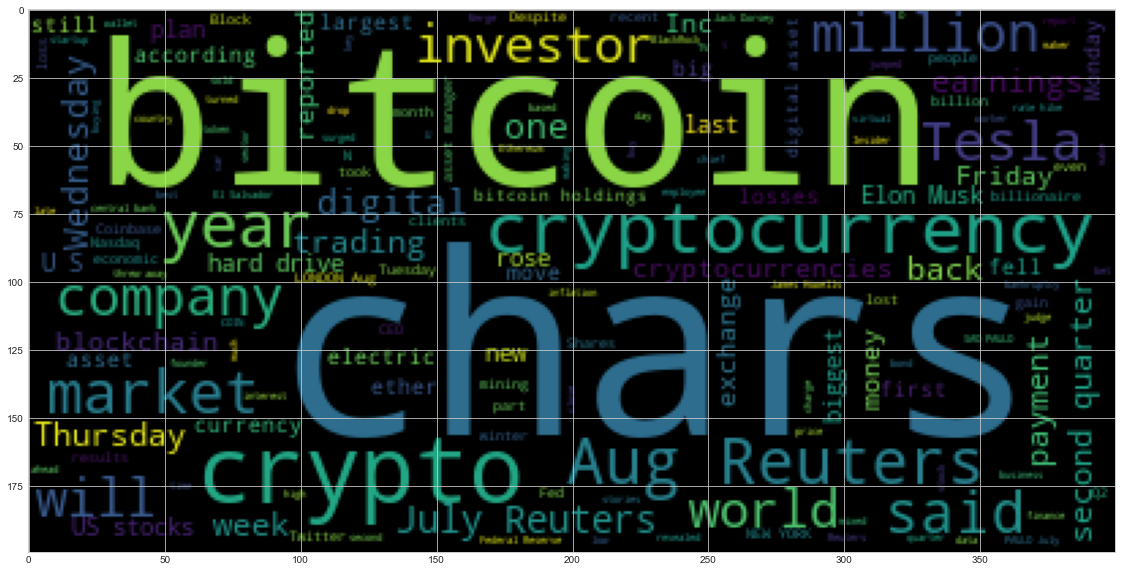

In [42]:
 # Generate the Bitcoin word cloud
btc_wordcloud = WordCloud().generate(bitcoin_df["text"].sum())
plt.imshow(btc_wordcloud)

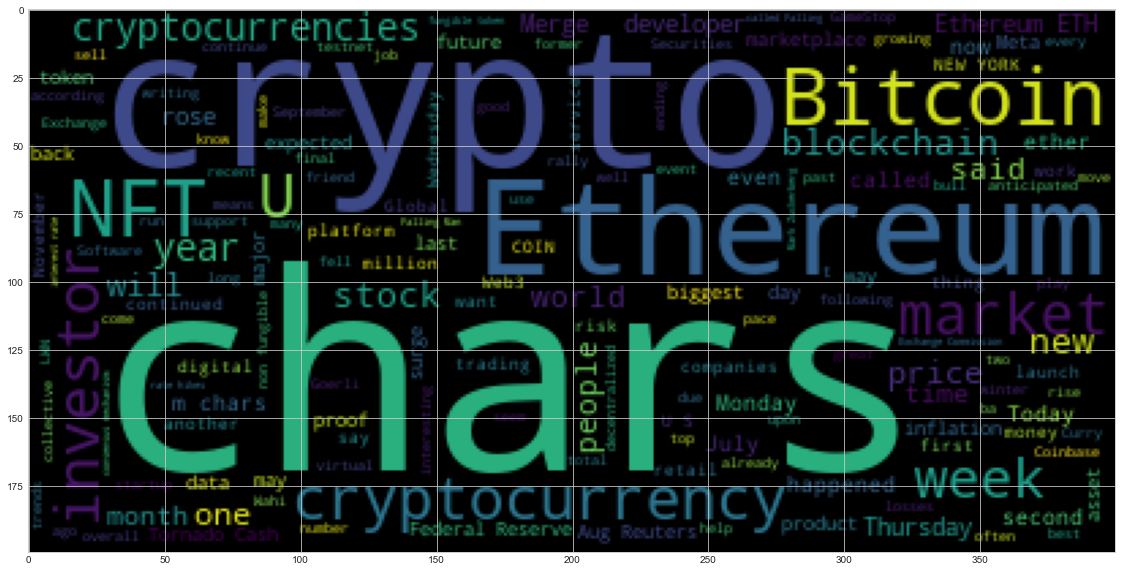

In [43]:
# Generate the Ethereum word cloud
eth_wordcloud = WordCloud().generate(ethereum_df["text"].sum())
plt.imshow(eth_wordcloud)

In [ ]:
# 3. Named Entity Recognition

In [44]:
import spacy
from spacy import displacy

In [ ]:
 # Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [45]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Bitcoin NER

In [46]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(bitcoin_df["text"])

In [48]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_text)

# Add a title to the document
doc_btc.user_data['title'] = 'Bitcoin NER'

In [49]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [50]:
# List all Entities
doc_btc.ents

(8:45 in the morning of June 13,
 Bill Stewart,
 Maine,
 Dynamics Mining,
 the last several years,
 millions,
 UK,
 mans,
 Every year,
 Belgium,
 the University of Cambridges Bitcoin Electricity Consump,
 Elon Musk,
 Tesla,
 Bitcoin,
 Q2,
 Reuters,
 6.85%,
 22,717.05,
 22:05,
 GMT,
 Wednesday,
 1,457.27,
 29.1%,
 the weeks,
 Krist,
 2021,
 Tesla,
 $936 million,
 the second quarter of 2022,
 Bitcoin,
 75,
 24,000,
 first,
 August,
 US,
 this week,
 as much as 4%,
 24,191,
 Aug 19,
 Reuters,
 Friday,
 three-week,
 Reuters,
 a good month,
 months,
 more than 17%,
 July,
 October,
 July 30,
 Reuters,
 3.36%,
 24,584.24,
 GMT,
 Saturday,
 798.93,
 39.7%,
 the year,
 2022,
 Wednesday,
 $2.3 billion,
 second-quarter,
 a record $3.3 billion,
 first,
 Reuters,
 the United States,
 NEW YORK,
 July 20,
 Reuters,
 Wednesday,
 Tesla Inc,
 TSLA.O,
 about 75%,
 fiat,
 ten,
 Wednesday,
 approximately 75%,
 Reuters,
 Bitcoin Valley,
 Honduran,
 Santa Lucia,
 one,
 Today,
 El Salvador,
 Tuesday,
 $1.6 b

In [ ]:
#Ethereum NER

In [51]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(ethereum_df["text"])

In [52]:
 # Run the NER processor on all of the text
doc_eth = nlp(eth_text)

# Add a title to the document
doc_eth.user_data['title'] = 'Ethereum NER'

In [53]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [54]:
# List all Entities
doc_eth.ents

(Every year,
 Belgium,
 the University of Cambridges Bitcoin Electricity Consump,
 NFT,
 Instagram,
 May,
 NF,
 The Securities and Exchange Commission,
 11,
 Less than two weeks,
 GameStops,
 Falling Man,
 The Ethereum Merge,
 2014,
 Merge,
 second,
 Ethereum,
 Ethereum,
 Vitalik Buterin,
 Thursday,
 the Ethereum Community Conference,
 Paris,
 Reuters,
 Ethereum and Bitcoin,
 this week,
 Monday,
 60%,
 Vivaldi,
 Jon von Tetzchner,
 +3393,
 the last month,
 Ethereum 2.0,
 second,
 The US Treasury Department's,
 Office of Foreign Asset Control,
 Monday,
 Tornado Cash,
 North Korean,
 Ameri,
 as much as 75%,
 JPMorgan,
 Monday,
 36%,
 102%,
 mid-June,
 Europe,
 one,
 millions of pounds,
 Mangnall,
 November 2021,
 Joe Hovde,
 New York,
 July 30,
 Reuters,
 3.36%,
 24,584.24,
 GMT,
 Saturday,
 798.93,
 39.7%,
 the year,
 Reuters,
 6.85%,
 22,717.05,
 22:05,
 GMT,
 Wednesday,
 1,457.27,
 29.1%,
 Ethereum Merge,
 next month,
 Glassnode,
 Ethereum,
 LONDON,
 Aug 11,
 Reuters,
 $3.12 trillion,